In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)


In [2]:
# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

In [4]:
X.shape

torch.Size([100, 1])

In [5]:
y.shape

torch.Size([100])

In [6]:
y = y.view(y.shape[0], 1)

In [7]:
y.shape

torch.Size([100, 1])

In [ ]:
n_samples, n_features = X.shape

In [10]:
# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [11]:
# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  


In [12]:

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


epoch: 10, loss = 3990.6357
epoch: 20, loss = 2813.8071
epoch: 30, loss = 2011.5869
epoch: 40, loss = 1464.6125
epoch: 50, loss = 1091.5934
epoch: 60, loss = 837.1535
epoch: 70, loss = 663.5635
epoch: 80, loss = 545.1096
epoch: 90, loss = 464.2634
epoch: 100, loss = 409.0748


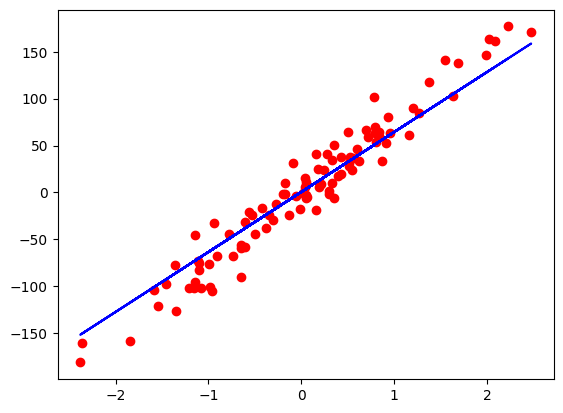

In [13]:
# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()